# Model NLP - Climate Change Sentiment

In [8]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [9]:
# Importação das bibliotecas 

import unicodedata
import sys
import string
import time
import csv
import nltk
import re

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

numpy     : 1.20.3
pandas    : 1.3.4
re        : 2.2.1
watermark : 2.3.0
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
csv       : 1.0
matplotlib: 3.4.3
seaborn   : 0.11.2
nltk      : 3.6.5



In [11]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [14]:
# Carregando a base de dados
data = pd.read_csv("twitter_sentiment_data.csv")

In [15]:
# Exibido 5 primeiros dados
data.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [16]:
# Exibido 5 últimos dados 
data.tail()

,sentiment,message,tweetid
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537
43942,1,@Likeabat77 @zachhaller \n\nThe wealthy + foss...,791401610308038656


In [10]:
# Verificando informações das variaveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [19]:
# Número de linhas e colunas
data.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [11]:
# Número de linhas e colunas
data.shape

(43943, 3)

In [17]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 43943
Números de colunas: 3


In [18]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   0

Unique values :  
 sentiment        4
message      41033
tweetid      43943
dtype: int64


In [21]:
# Verificando a sentimento
data.sentiment.value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [15]:
# Verificação contagem de texto
data.value_counts()

sentiment  message                                                                                                                                         tweetid           
-1         #BillNye Grade school science guy spreading lie of climate change #CNN donna doesn't match truth does… https://t.co/zi4lfot0ru                  855766326614294528    1
 1         RT @jtotheizzoe: I guess climate change, the most critical issue facing us and every 👱👩and 👶 on Earth, will to have to wait for 2020 🔥🌎😔 #d…    788929874115166208    1
           RT @jswatz: For those of you swarming in to say that climate change is a hoax, here's a good primer from @JustinHGillis https://t.co/sfp2fRâ€¦  956223386480504832    1
           RT @jswatz: For those who saw a sign of moderated views on climate change in E.P.A. chief Pruitt's confirmation hearing: uh, no. https://t.…    839912605858803716    1
           RT @jswatz: Mesmerizing: See how climate change and human action alter the landscape. @dwtkns @henr

In [22]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,43943.0,8.539244e-01,8.535434e-01,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
tweetid,43943.0,8.367966e+17,8.568506e+16,5.926334e+17,7.970376e+17,8.402301e+17,9.020003e+17,9.667024e+17


Text(0.5, 1.0, 'Matriz de correlação')

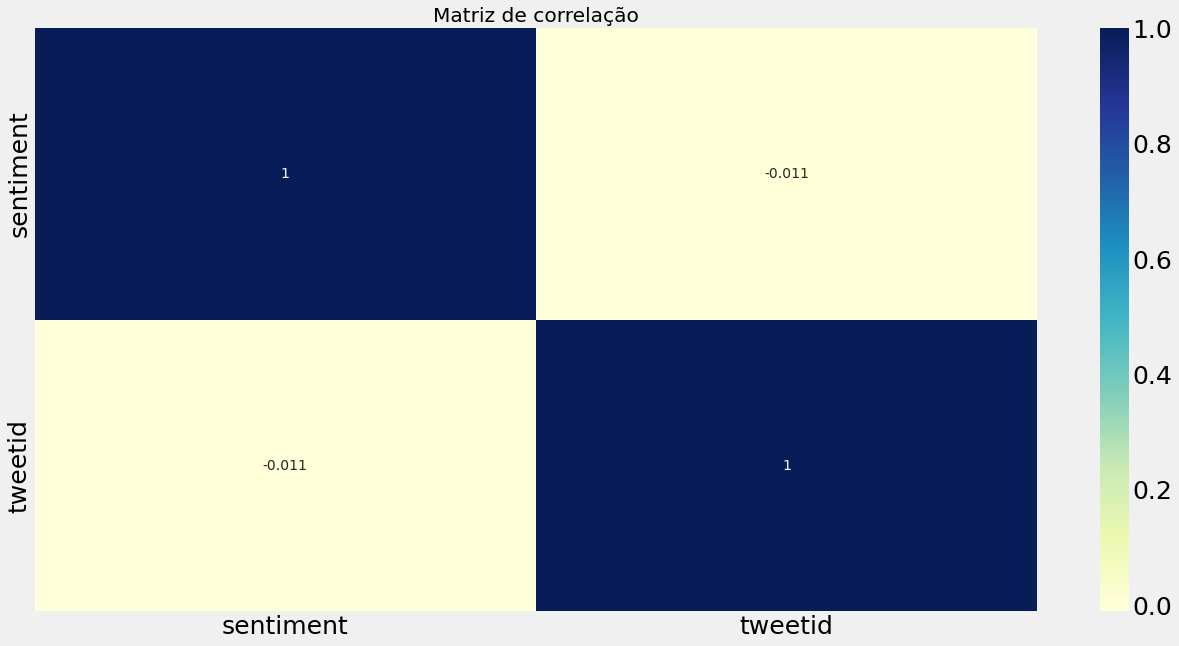

In [24]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

Text(0, 0.5, 'Total')

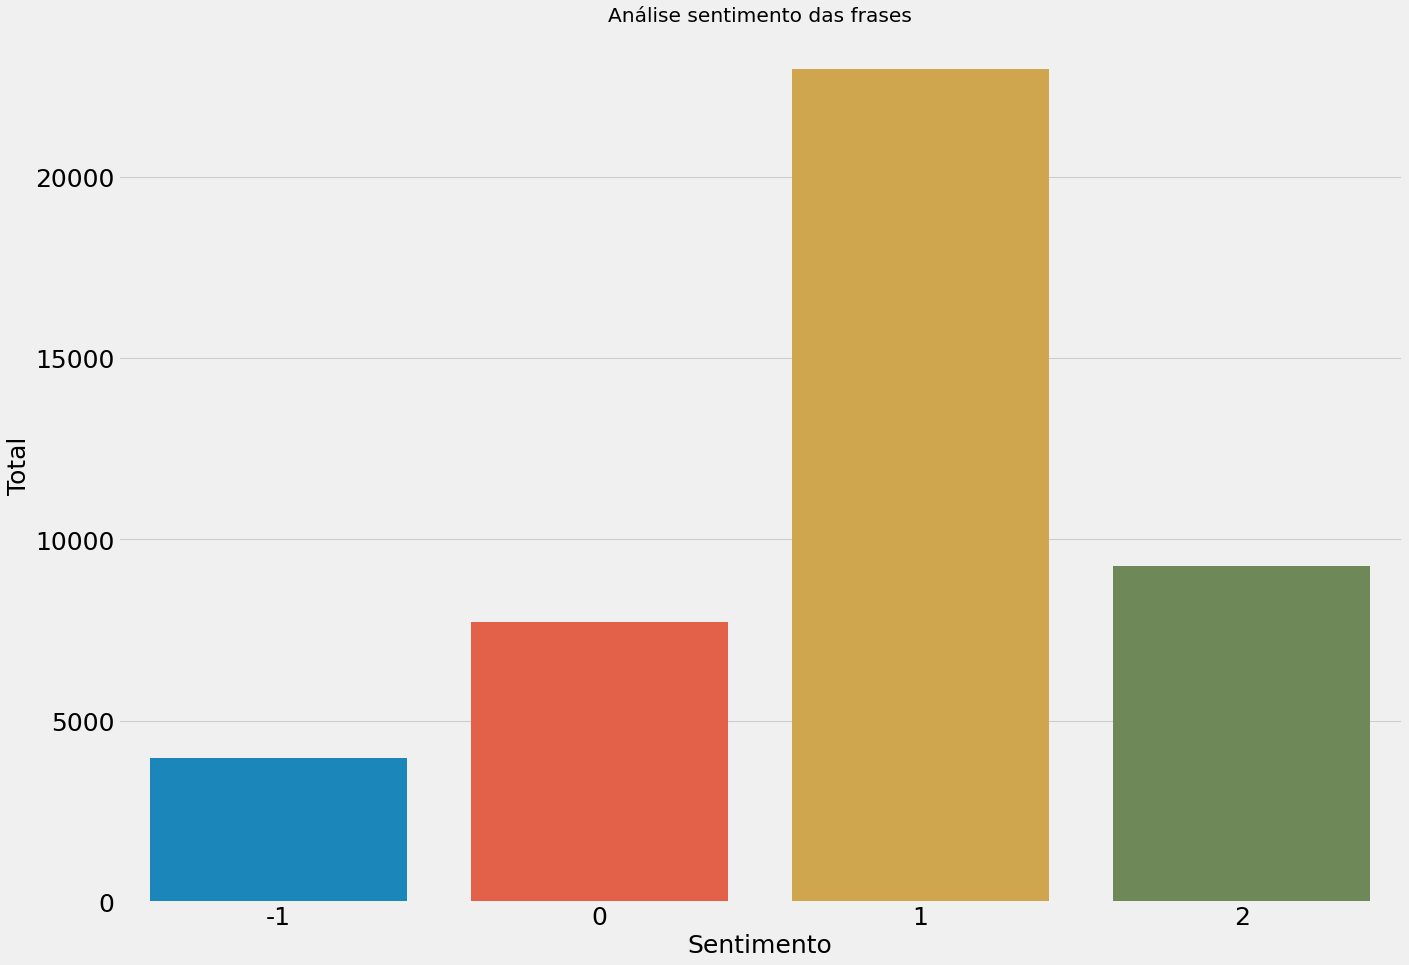

In [26]:
# Gráfico de Análise sentimento

plt.figure(figsize=(20.5,15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(data["sentiment"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

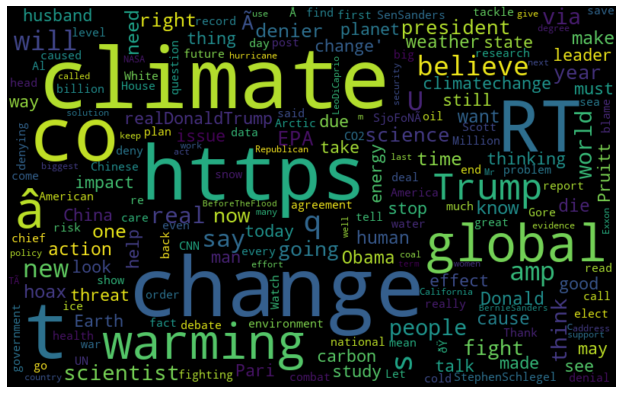

In [21]:
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([message for message in data["message"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
# Contagem de sentimento na base de dados
data.sentiment.count()

43943

In [28]:
# Retirando palavras duplicadas
data.drop_duplicates(["message"], inplace = True)
data.message.count()

41033

# Treino e Teste

- Treino e teste da base de dados da coluna message e sentimento

In [27]:
# Variável para treino
train = data["message"]

# Variável para teste
test = data["sentiment"]

In [28]:
# Total de linhas e colunas dados variável x
train.shape

(43943,)

In [29]:
# Total de linhas e colunas dados variável y
test.shape

(43943,)

In [30]:
# Download stopwords, Punkt

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo stop words
def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# stemming no dataset
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# Limpando base de dados
def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

# Redução de palavras flexionadas
def Lemmatization(instancia):
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Pré-processamento removendo stopword e removendo caracteres indesejados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [32]:
# Visualização dos textos
train = [Preprocessing(i) for i in train]
train[:50]

['@tiniebeany climate change is an interesting hustle it was global warming but the planet stopped warming 15 yes while the suv boom',
 'rt @natgeochannel watch #beforetheflood right here, @leodicaprio travels the world to tackle climate change httã¢â‚¬â¦',
 "fabulous! leonardo #dicaprio's film on #climate change is brilliant!!! watch via @youtube",
 'rt @mick_fanning just watched this amazing documentary by leonardodicaprio on climate change we all think thisã¢â‚¬â¦',
 'rt @cnalive pranita biswasi, lutheran from odisha, gives testimony on effects of climate change &amp natural disasters on the poã¢â‚¬â¦',
 'unamshow awache kujinga iko global warming',
 'rt @cnalive pranita biswasi, lutheran from odisha, gives testimony on effects of climate change &amp natural disasters on the poã¢â‚¬â¦',
 'rt @cciriviera presidential candidate #donaldtrump is ã¢â‚¬å“dangerousã¢â‚¬ï†\x9d on climate change, says #monaco ã¢â‚¬â„¢s prince albertã¢â‚¬â¦',
 "rt @americanindian8 leonardo dicaprio's climate 

In [33]:
# Modelo criado para classificar tweets positivos, negativos
# CountVectorizer criar um vocabulário de palavras e retornar em vetor

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

token = TweetTokenizer()
token_vect = CountVectorizer(analyzer = "word", tokenizer = token.tokenize)
token_freq = token_vect.fit_transform(train)
token_freq.shape

(43943, 54534)

# Modelo - Machine learning

- Modelo 01 - Naive bayes

In [36]:
# Modelo machine learning - 2

# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(token_freq, test)

# Score do modelo
model_naive_bayes_scor = model_naive_bayes.score(token_freq, test)
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 81.67


In [46]:
# Probabilidade do modelo

naive_bayes_predict = naive_bayes_model.predict_proba(token_freq).round(2)
naive_bayes_predict

array([[0.64, 0.19, 0.17, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.02, 0.98, 0.  ],
       ...,
       [0.  , 0.01, 0.03, 0.97],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ]])

In [48]:
# Previsão do modelo

naive_bayes_predict = naive_bayes_model.predict(token_freq)
naive_bayes_predict

array([-1,  1,  1, ...,  2,  0,  1], dtype=int64)

In [50]:
# Accuracy do modelo  
from sklearn.metrics import accuracy_score

accuracy_naive_bayes_multinomialNB = accuracy_score(test, naive_bayes_predict)
print("Accuracy - Naive bayes multinomialNB: %.2f" % (accuracy_naive_bayes_multinomialNB * 100))

Accuracy - Naive bayes multinomialNB: 80.74


In [52]:
# Confusion matrix do modelo
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(test, naive_bayes_predict)

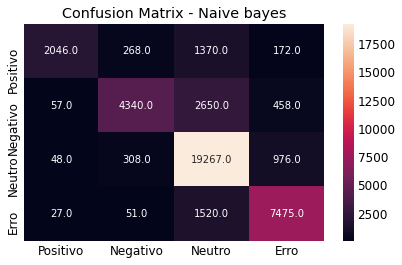

In [55]:
# Confusion matrix do modelo

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro", "Erro"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', "Neutro", "Erro"]);

In [57]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(test, naive_bayes_predict)
print("Modelo 01 - Naive bayes multinomialNB")
print()
print(classification)

Modelo 01 - Naive bayes multinomialNB

              precision    recall  f1-score   support

          -1       0.94      0.53      0.68      3856
           0       0.87      0.58      0.70      7505
           1       0.78      0.94      0.85     20599
           2       0.82      0.82      0.82      9073

    accuracy                           0.81     41033
   macro avg       0.85      0.72      0.76     41033
weighted avg       0.82      0.81      0.80     41033



# Modelo machine learning 2 - Logistic Regression

In [37]:
# Modelo Regressão logística- 2
# Modelo machine learning - Regressão logística

# Importação da biblioteca sklearn o modelo
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression()

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(token_freq, test)

# Score do modelo
model_logistic_scor = model_logistic.score(token_freq, test)

# Print do score modelo
print("Model - Logistic Regression: %.2f" % (model_logistic_scor * 100))

Model - Logistic Regression: 92.09


In [39]:
# Previsão do modelo
model_regression_logistic_pred = model_logistic.predict(token_freq)
model_regression_logistic_pred

array([-1,  1,  1, ...,  2,  0,  1], dtype=int64)

In [42]:
# Previsão do modelo com função probabilidade 
model_regression_logistic_pred = model_logistic.predict_log_proba(token_freq)
model_regression_logistic_pred

array([[-2.63843060e-01, -1.86881315e+00, -2.55760201e+00,
        -9.12513545e+00],
       [-9.91629880e+00, -6.11146127e+00, -4.17149108e-03,
        -6.26793998e+00],
       [-2.87288901e+00, -3.00306171e+00, -1.12241656e-01,
        -1.33836966e+01],
       ...,
       [-3.29029381e+00, -1.47512799e+00, -3.16545658e+00,
        -3.68439917e-01],
       [-2.78404971e+00, -1.62151176e-01, -2.43307572e+00,
        -8.92439338e+00],
       [-3.16338066e+00, -4.53089746e+00, -5.56573996e-02,
        -6.82773862e+00]])

In [64]:
# Accuracy do modelo
acuracia_Logistic_Regression = accuracy_score(test, model_regression_logistic_pred)

print("Accuracy - Decision Tree: %.2f" % (acuracia_Logistic_Regression * 100))

Accuracy - Decision Tree: 92.13


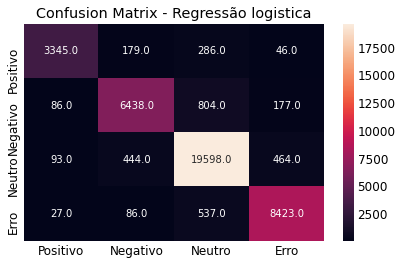

In [66]:
# Confusion matrix do modelo

matrix_confusion_3 = confusion_matrix(test, model_regression_logistic_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Regressão logistica'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro", "Erro"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', "Neutro", "Erro"]);

In [67]:
# Classification report
classification = classification_report(test, model_regression_logistic_pred)
print("Modelo 02 - Regressão logistica")
print()
print(classification)

Modelo 02 - Regressão logistica

              precision    recall  f1-score   support

          -1       0.94      0.87      0.90      3856
           0       0.90      0.86      0.88      7505
           1       0.92      0.95      0.94     20599
           2       0.92      0.93      0.93      9073

    accuracy                           0.92     41033
   macro avg       0.92      0.90      0.91     41033
weighted avg       0.92      0.92      0.92     41033

